<div style="text-align:center;
            font-size:30px;
            border-bottom:solid;
            background-color:#651A80;
            opacity:0.5;
            color:white;
            border-roundness:30px;
            border-radius: 25px;">
    Augmentation methods
    </div>

<div class="alert alert-block alert-info"
     style="border-radius:30px">
<b>What we will try:</b> 
    
* Cropping image and than scaling it
* Shifting audio and pading it with silence
* Spec augmentation
* noise injection
* changing pitch
* reverberation</div>

<div style="border-radius:30px;
            background-color:RGB(249, 191, 255)">
<b><center>Procedure:</center></b> 
    
* Read how many samples of speaker are in train dataset
* Augment audio till specified no. samples
</div>

In [2]:
from backend.spectrograms import (
    loader,
    utils
)
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

random.seed(420)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#audiomentations

In [9]:
import audiomentations

In [10]:
from backend.audio_to_spectrogram_converter import AudioToSpectrogramConverter
from backend.audio_data import AudioData

In [11]:
from data_preprocessing.augmentation import audio
from data_preprocessing.augmentation import compose

In [3]:
spectrograms_path = r"C:\Users\micha\Desktop\repozytoria\intro-to-ml\data\v3\tsrc_sprectrograms"
spectrogram_data = loader.SpectrogramLoader().load_data(spectrograms_path)

na jakim obiekcie transform? <br>
jaki jest wynik? <br>
def transform1 : image -> image

In [4]:
sample_image = cv2.imread(spectrogram_data[0].file_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

In [5]:
def plot_image(image):
    fig, axes = plt.subplots(1, 1)
    axes.imshow(image)

In [7]:
path_to_audio = "../data/v3/tsrc_train_test/"
audio_data = utils.AudioLoader().load_data(path_to_audio)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 800.26it/s]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1104/1104 [00:01<00:00, 801.36it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 706.01it/s]


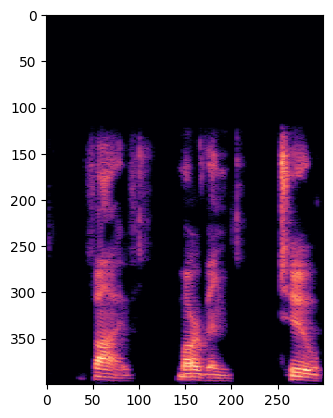

In [8]:
plot_image(sample_image)

range_col: [0, 150]


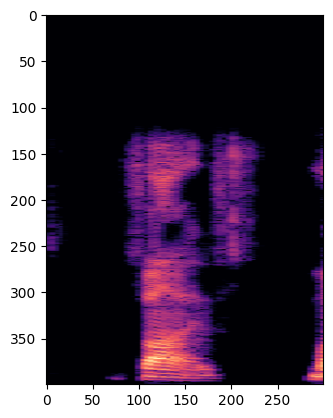

In [9]:
transformed_image = image_crop(sample_image, [0, 150])
transformed_image = image_strech(transformed_image)
plot_image(transformed_image)

range_col: [1, 241]


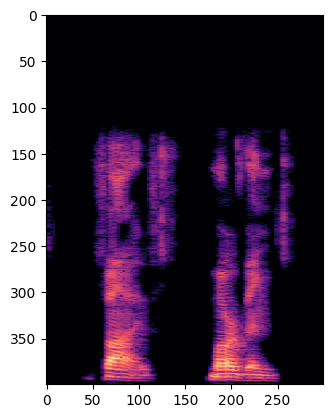

In [10]:
transformed_image = image_random_crop_and_resize(sample_image, col_percentage=0.8)
plot_image(transformed_image)

In [11]:
import librosa

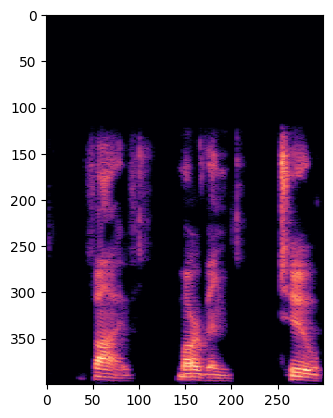

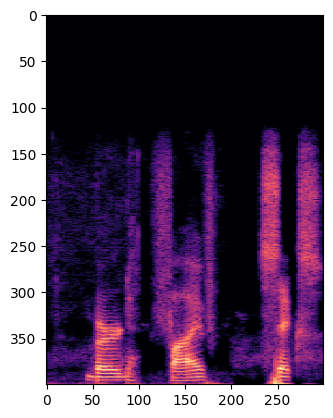

In [12]:
sample_image2 = cv2.imread(spectrogram_data[1].file_path)
sample_image2 = cv2.cvtColor(sample_image2, cv2.COLOR_BGR2RGB)
plot_image(sample_image)
plot_image(sample_image2)

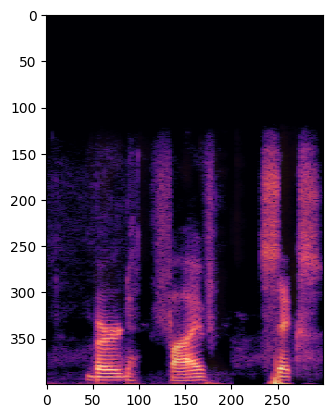

In [13]:
plot_image(cv2.addWeighted(sample_image, 0.1, sample_image2, 0.9, 0.0))

In [14]:
def add_noise(y, sr, noise_factor = 0.005):
    noise = np.random.normal(0, noise_factor, len(y))
    return y + noise, sr

In [17]:
i = 0
transformed_y, transformed_sr = add_noise(audio_data[i].samples, audio_data[i].sample_rate, noise_factor=0.0005)
transformed_audio = AudioData(transformed_y, transformed_sr, train_validaton_test='...', speaker_id=0, class_id=-1)

In [39]:
i = 0
transformed_y, transformed_sr = scale_audio(audio_data[i].samples, audio_data[i].sample_rate, factor=10)
transformed_audio = AudioData(transformed_y, transformed_sr, train_validaton_test='...', speaker_id=0, class_id=-1)

In [52]:
audio_data[i].samples.shape[0]

22050

In [57]:
i = 0
transformed_y, transformed_sr = shift_and_pad(audio_data[i].samples, audio_data[i].sample_rate, 0.5)
transformed_audio = AudioData(transformed_y, transformed_sr, train_validaton_test='...', speaker_id=0, class_id=-1)

11025


In [68]:
transformed_y, transformed_sr = change_pitch(audio_data[i].samples, audio_data[i].sample_rate, 20), audio_data[i].sample_rate
transformed_audio = AudioData(transformed_y, transformed_sr, train_validaton_test='...', speaker_id=0, class_id=-1)

In [33]:
transformed_y, transformed_sr = add_reverb(audio_data[i].samples, audio_data[i].sample_rate), audio_data[i].sample_rate
transformed_audio = AudioData(transformed_y, transformed_sr, train_validaton_test='...', speaker_id=0, class_id=-1)

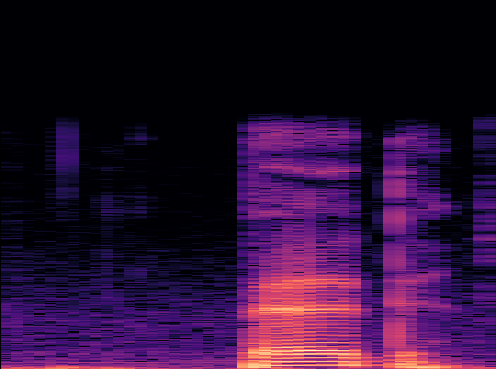

In [34]:
AudioToSpectrogramConverter().convert(audio_data[i])

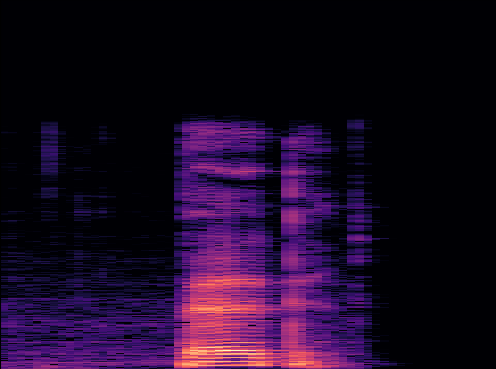

In [35]:
AudioToSpectrogramConverter().convert(transformed_audio)

In [ ]:
AudioToSpectrogramConverter().convert_to_bytes(audio_data[0])

---

In [41]:
def append(s, ap):
    return s + ap

In [10]:
('raz dwa trzy', sq)

('raz dwa trzy', <function __main__.sq(x)>)

In [12]:
from data_preprocessing.augmentation import compose

In [ ]:
from data_preprocessing.augmentation import audio

In [13]:
from functools import partial
from data_preprocessing.augmentation import compose

transformations = compose.Compose([
    (partial(audio.addNoise, ap=0.005), 0.5)
])

In [172]:
transformations("raz", 3)

'razdwadwadwadwa'

In [14]:
audio.augment_audio_files(r"../data/v3/tsrc_train_test", r"../data/v3/augmented", transformations)

Loading audio files... C:\Users\micha\Desktop\repozytoria\intro-to-ml\data\v3\tsrc_train_test


0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 266.72it/s]
0it [00:00, ?it/s]
  4%|██▋                                                                         | 1210/33941 [00:04<01:53, 289.26it/s]


KeyboardInterrupt: 

In [148]:
a = set()

In [154]:
a.add("b")

In [155]:
a

{'a', 'b'}

In [138]:
path_to_audio = "../data/v3/audio_test/train"
audio_data = utils.AudioLoader().load_data(path_to_audio)

0it [00:00, ?it/s]
 37%|████████████████████████████▊                                                 | 634/1713 [00:02<00:03, 292.98it/s]


KeyboardInterrupt: 

* chcemy dla danego speakera dla danego słowa mieć k próbek

In [133]:
audio_data[0].cl

0